<a href="https://colab.research.google.com/github/kyalan/CUHK-PyTutorial-2018/blob/master/Week_12_tf_hub_getting_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Object Detection from tf hub model

In [3]:
try:
    %tensorflow_version 2.x 
except: 
    pass

import tensorflow as tf
import tensorflow_hub as hub

print('Tensorflow\'s version: {}'.format(tf.__version__))

Tensorflow's version: 2.4.1


In [14]:
from google.colab import files

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import pandas as pd
import numpy as np
from datetime import datetime as datetime
import os, re, sys

### 1. Import picture into colab

In [5]:
uploaded = files.upload()
for k, v in uploaded.items():
    open(k, 'wb').write(v)

In [6]:
image_path = 'test.jpg'
img = mpimg.imread(image_path)
# np.array
print(f'Image imported with shape {img.shape}') 

Image imported with shape (720, 960, 3)


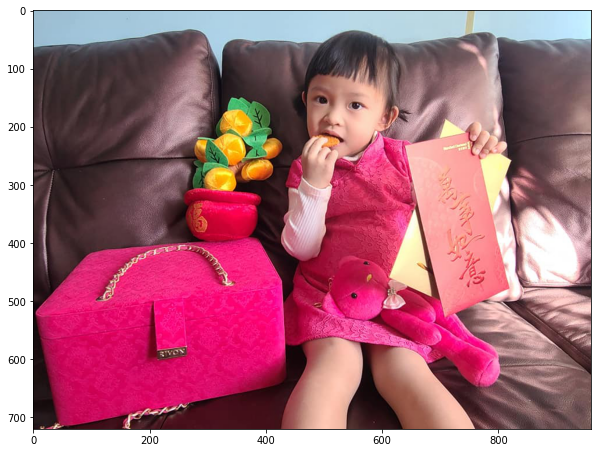

In [7]:
fig = plt.figure(figsize=(10,8))
plt.imshow(img)

### 2. Import Model from tf hub

[Tensorflow Hub Website](https://tfhub.dev/)

In [17]:
# We are going to load the model - Inception Resnet v2
# with Model site: https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1 
model = hub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1').signatures['default']
print('Model Loaded.')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model Loaded.


### 3. Influence

According to the spec of inputs: <br>
* The input tensor is a tf.float32 tensor with shape [1, height, width, 3] 
* with values in [0.0, 1.0].
<br> We need to pre-process the input images.

In [21]:
img_np = img.copy()
print(f'Before pre-processing, the image shape = {img_np.shape}')

Before pre-processing, the image shape = (720, 960, 3)


In [22]:
img_np = np.expand_dims(img_np, axis=0).astype(np.float) / 255.0 
img_tf = tf.convert_to_tensor(img_np)
img_tf = tf.cast(img_tf, tf.float32)

Pre-process done.

In [24]:
results = model(img_tf)

result = {key:value.numpy() for key,value in results.items()}
for key, value in result.items():
    print(key, ':', value.shape, value.dtype)

detection_scores : (100,) <dtype: 'float32'>
detection_class_labels : (100,) <dtype: 'int64'>
detection_class_entities : (100,) <dtype: 'string'>
detection_class_names : (100,) <dtype: 'string'>
detection_boxes : (100, 4) <dtype: 'float32'>
